<a href="https://colab.research.google.com/github/cyleung428/Classification-on-spam-mail/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outline of the report** 
1. Introduction
- Objective and Significance
- Dataset and Attribute

2. Preparation
- Data splitting
- Normalization

3. Methodology & Analysis
- Decision Tree
- K-Nearest Neighbors
- Adaptive Boosting
- Kmeans Clustering

4. Conclusion


**Introduction - Objective and Significance**

With the advancement of the internet, spam mails, such as advertisments for products and phishing mails, are ubiquitous. Therefore, our aim is to develop a model to identify spam mails by analyzing the frequency of words like a spam mail filter.

**Introduction - Dataset and Attribute**

The dataset is obtained from [OpenML](https://www.openml.org/d/44).The dataset contains processed data. If we nned to implement the model, we need a program to turn email contents into attribute-values. The following code will show the basic information about the dataset.

Load the spambase data file 'dataset_44_spambase.arff'.

In [0]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = arff.loadarff('dataset_44_spambase.arff')
df = pd.DataFrame(data[0])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

**Preparation - Data splitting**

Split the dataset into testing set and training set (Holdout method). 40% of the whole data will be seperated into testing data. 60% of the whole data will be seperated into training data.


In [0]:
X = df.iloc[:, 0:56] # col 0 to 55 is attribute
Y = df['class']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, # randomly holdout 40% of data
                                                    random_state=0) # using a random seed of 0.

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape # show the dimensions of the training and testing data

((2760, 56), (2760,), (1841, 56), (1841,))

**Preparation - Normalization**

We will use min-max normalization. The range of value from different attributes are diverse. Some of them are below 1 and some of them are more than 100. Using min-max normalization can ensure that every attribute contribute in the same weight, which could slightly improve the performance of the model.

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors Algorithm

Knn, a supervised learning algorithm, aims to determine the class value by finding the majority class of k nearest neighbors. It is an easy and simple algorithm.  

First, we need to determine the value of k which could provides the best performance of the model. We will do the cross-validation and get the averge score for each value of k ranging from 1 to 50. 

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
import numpy as np
#create a new KNN model
test_results = []
k_values = np.linspace(1, 50, 50, endpoint=True)
for k in k_values:
   clf = neighbors.KNeighborsClassifier(n_neighbors=int(k))
   cv_scores = cross_val_score(clf, X, Y, cv=10)
   test_results.append(np.mean(cv_scores))

From the below graph, when k equals to 1, knn returns the best cross validation score. 

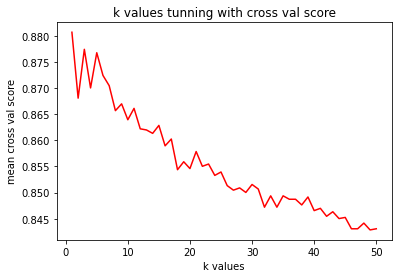

In [0]:
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(k_values, test_results, 'r', label="cross val score")
plt.ylabel("mean cross val score")
plt.xlabel("k values")
plt.title("k values tunning with cross val score")
plt.show()

Accuracy is not the only thing we care when it comes to the performance of the model. We will also compare the auc rate for all values from 1 to 50 for k. Auc scores are the value representing the area percentage under the roc curve. A roc curve shows the relationship between TPR and FPR. A good auc scores means that the model can achieve a good TPR with a relatively low FPR. 

In [0]:
from scipy.io import arff
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score

k_values = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for k in k_values:
   clf = neighbors.KNeighborsClassifier(n_neighbors=int(k))
   clf.fit(X_train, Y_train)
   train_pred = clf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = clf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)


# n_estimators = number of weak classifier to train

# learning_rate = weights of weak classifiers, default as 1

From the below graph, the model returns the best AUC score when k equals to 1. As k equals to one return the best AUC score and cross validation score, we will choose k = 1 for our Knn algorithm.

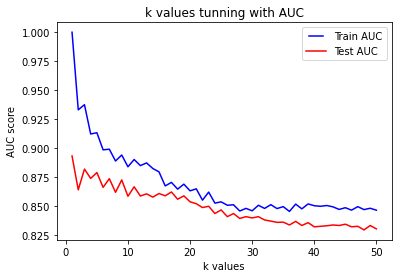

In [0]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(k_values, train_results, 'b', label="Train AUC")
line2, = plt.plot(k_values, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("k values")
plt.title("k values tunning with AUC")
plt.show()

We try k=1 parameter for the knn classification

In [0]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Then, make the prediction on the testing dataset

In [0]:
Y_pred = clf.predict(X_test)

Analysis on K-Nearest Neighbors Algorithm. We plot the confusion matrix for the model. From the below confusion matrix, we get a good result at all. The accuracy is 0.9. The precision is 0.88. The f1-score is 0.87. As the precision is very high, we can say that the model can define almost all positive class correctly.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
tn,fp,fn,tp

[[1006   91]
 [  97  647]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1097
           1       0.88      0.87      0.87       744

    accuracy                           0.90      1841
   macro avg       0.89      0.89      0.89      1841
weighted avg       0.90      0.90      0.90      1841



(1006, 91, 97, 647)

The below ROC curve shows the roc curve of Knn. It has a auc score of 0.89, which means it could archeive a high TPR in a low FPR. It has only 3 points because the probablity of an instance is either 1 or 0 as we pick k = 1 in parameters. The points actually depends on different probabilities. As there are only two options in probabilities, the options in fpr and tpr are few.

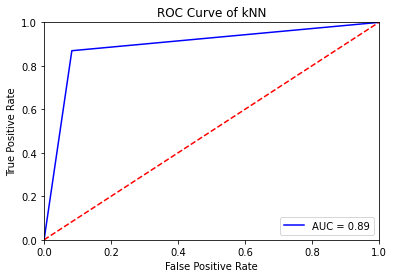

In [0]:

y_scores = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [0]:
prob = clf.predict_proba(X_test)
prob_pos = prob[:,clf.classes_==1]
roc_auc = roc_auc_score(Y_test,prob_pos)
print("ROC AUC: {:.2f}".format(roc_auc))

ROC AUC: 0.89


# Ensemble Learning (AdaBoost Classifier)

AdaBoost classifier, short for Adaptive Boosting, aims to train numbers of weak classifiers into a strong one by adding weights to the classifiers with higher accuracy.
<br>

First, we test the AdaBoost classifier with its default settings, n_estimators as 50 and learning_rate as 1.
<br>
n_estimators refers to the number of weak classifier used to train the resulting classifier. 
<br>
learning rate_ refers to the weight of new classifier affecting the existing one. 

In [0]:
from scipy.io import arff
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Create AdaBoost Classifier
AdaModel = AdaBoostClassifier(n_estimators=50,learning_rate=1)

After creating the AdaBoose Classifier object, we fit the training data into the model and train the classifier.

In [0]:
# train classifier
model = AdaModel.fit(X_train,Y_train)

Then, we use the trained model to predict to test set. After comparing the reuslt of predictions and the actual class value of test set, accuracy is printed. The accuracy is 0.9342748506246605. It is higher than the K-Nearest Neighbours model and the decision tree model trained in this project, meaning that AdaBoost Classifier have a higher chance of correctly classifying data than the other model.

In [0]:
# predict
Y_pred = model.predict(X_test)

print("Accuracy", metrics.accuracy_score(Y_test,Y_pred))


Accuracy 0.9342748506246605


Next, looking at the confusion matrix, the accuracy is 0.93, the precision is 0.94, the recall is 0.90 and the f1-score is 0.92.
<br>
As we can see that the percision is high, it means that the false positive rate is very low, almost all the cases classified as positive is correct.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1053   44]
 [  77  667]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1097
           1       0.94      0.90      0.92       744

    accuracy                           0.93      1841
   macro avg       0.93      0.93      0.93      1841
weighted avg       0.93      0.93      0.93      1841



Looking at the ROC curve and AUC score, we can see that the classifier obtained 0.98 AUC score, meaning that the area under the curve has 98% of the whole graph. It shows that the false positive rate is low when the true positive rate is high. 

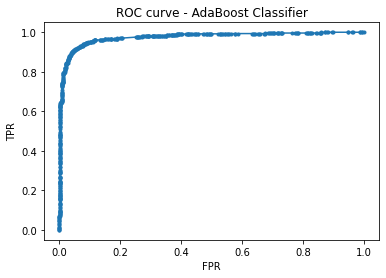

In [0]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score

prob = AdaModel.predict_proba(X_test)
prob_pos = prob[:,AdaModel.classes_==1]
fpr, tpr, _ = roc_curve(Y_test,prob_pos,1)
plt.plot(fpr, tpr, marker='.', label='Ensemble Learning (AdaBoost Classifier)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - AdaBoost Classifier')
plt.show()

In [0]:
roc_auc = roc_auc_score(Y_test,prob_pos)
print("ROC AUC: {:.2f}".format(roc_auc))

ROC AUC: 0.98


Next, We try to tune the parameters to test if the classifier can perform even better.
<br>
First, we tested different number of learning rate ranging from 0 to 1. The n_estimators remain as 50.

In [0]:
learning_rates = np.linspace(0.01, 1, 100, endpoint=True)
train_results = []
test_results = []
for learning_rate in learning_rates:
   AdaModel = AdaModel = AdaBoostClassifier(n_estimators=50,learning_rate=learning_rate)
   AdaModel.fit(X_train, Y_train)
   train_pred = AdaModel.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = AdaModel.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)



From the graph of AUC score at different learning rate, We can see that the score increase significantly when the learning rate increase from 0 to 0.3. It means that the classifier is learning more when learning rate increase from 0 to 0.3. From learnign rate ranging from 0.3 to 1.0, there is not much difference between the AUC scores. We picked 0.65 as the AUC is maximum at around 0.65.

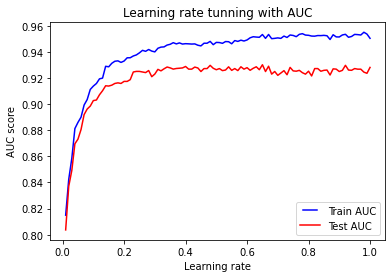

In [0]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Learning rate")
plt.title("Learning rate tunning with AUC")
plt.show()

Next, we tested different n_estimators number ranging from 0 to 100. In this test, the learning rate remains as 1.

In [0]:
from scipy.io import arff
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

n_estimators = np.linspace(2, 100, 99, endpoint=True)
train_results = []
test_results = []
for n_estimator in n_estimators:
   AdaModel = AdaModel = AdaBoostClassifier(n_estimators=int(n_estimator))
   AdaModel.fit(X_train, Y_train)
   train_pred = AdaModel.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = AdaModel.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)


# n_estimators = number of weak classifier to train

# learning_rate = weights of weak classifiers, default as 1

From the graph, we can see there is a peak performance when n_estimators is around 45-55. We think that the default value, 50, is good enough as it reaches maximum performance at n_estimators = 50.

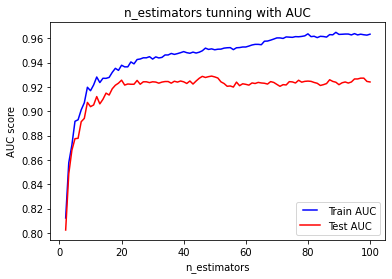

In [0]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.title("n_estimators tunning with AUC")
plt.show()

Now, we will train the classifier again with the tuned parameter, n_estimators as 50 and learning rate as 0.65. Then we will fit the training data and predict the test set. Lastly, accuracy is printed out. The accuracy of the refined model is 93.69907658881043%, which increased by 0.2% comparing to the original classifier.

In [0]:
# Create AdaBoost Classifier
RefinedAdaModel = AdaBoostClassifier(n_estimators=50,learning_rate=0.65)
# train classifier
refinedModel = RefinedAdaModel.fit(X_train,Y_train)

# predict
refined_Y_pred = refinedModel.predict(X_test)

print("Accuracy", metrics.accuracy_score(Y_test,refined_Y_pred))


Accuracy 0.9369907658881043


Looking at the confusion matrix, the accuracy is 0.94, the precision is 0.95, the recall is 0.90, the f1-score is 0.92.

Comparing to previous result, we can see that the accuracy and precision both increase by 0.01 while the recall and f1-score remain the same. Refering to the coefficient matrix, we can see that the number of true positive cases increased significantly. Therefore, both prescision and accuracy increased. It can be concluded that this classifier perform better than the original  AdaBoost classifier with default settings.



In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, refined_Y_pred))
print(classification_report(Y_test, refined_Y_pred))

[[1059   38]
 [  78  666]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1097
           1       0.95      0.90      0.92       744

    accuracy                           0.94      1841
   macro avg       0.94      0.93      0.93      1841
weighted avg       0.94      0.94      0.94      1841



For the ROC curve and AUC score, the score is 0.97. It may due to the slight increase of false positive.

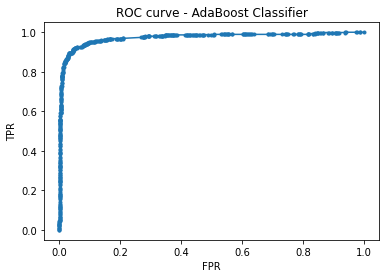

In [0]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score

prob = refinedModel.predict_proba(X_test)
refined_prob_pos = prob[:,refinedModel.classes_==1]
fpr, tpr, _ = roc_curve(Y_test,refined_prob_pos,1)
plt.plot(fpr, tpr, marker='.', label='Ensemble Learning (AdaBoost Classifier)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - AdaBoost Classifier')
plt.show()

In [0]:
refined_roc_auc = roc_auc_score(Y_test,refined_prob_pos)
print("ROC AUC: {:.2f}".format(refined_roc_auc))

ROC AUC: 0.97


Although there is 0.01 decrease with the AUC score, we can still conclude that the refined classifier did a very good job in classifying in this problem as the accuracy and precision is more important to evaluate the model. The accuracuy acheived is higher than the K-Nearest Neighbors algorithm model and decision tree model we also tested in this report.

# Clustering Learning (k-means)

As this is not a classifier, I will not split the data for clustering.

Load the whole dataset and calculate the best K (hopefully it will be 2).

Unfortunately, the elbow method suggests the k be 4.

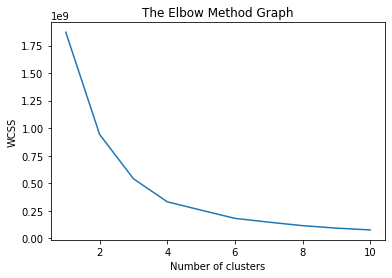

In [0]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.cluster import KMeans

data = arff.loadarff('dataset_44_spambase.arff')
df = pd.DataFrame(data[0])

wcss=[]

for i in range(1,11): 
  kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Try K-mean where K=2.

In [0]:
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(df)
df['Cluster'] = y_kmeans

TP=0
for i in range (0,4601):
  if df['Cluster'][i] == 1 and df['class'][i] == b'0':
    TP = TP +1;

TN = 0
for i in range (0,4601):
  if df['Cluster'][i] == 0 and df['class'][i] == b'1':
    TN = TN +1;

FP = 0
for i in range (0,4601):
  if df['Cluster'][i] == 1 and df['class'][i] == b'1':
    FP = FP +1;

FN = 0
for i in range (0,4601):
  if df['Cluster'][i] == 0 and df['class'][i] == b'0':
    FN = FN +1;

print("TP:{} TN:{} FP:{} FN:{}".format(TP,TN,FP,FN))
print("accuracy:{}".format((TP+TN)/4601))


TP:2735 TN:191 FP:1622 FN:53
accuracy:0.635948706802869


As our aim is to make a spam mail filter, the K-means does not a provide good performance. The elbow method also tells us that the situation with k=4 will be better. Therefore, K-means may not be suitable for our aim.

# Decision Tree



Process the data and split the data into train and test sets again so that the variables will not be affected by the above coding.


In [0]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

data = arff.loadarff('dataset_44_spambase.arff')
df = pd.DataFrame(data[0])

df.head()

X = df.iloc[:, 0:56] # col 0 to 55 is attribute
Y = df['class']


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4,random_state=0) # using a random seed of 0.

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape # show the dimensions of the training and testing data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



Train the model using both gini and entropy. With the setting max_depth=5, min_samples_leaf=0.005 and min_samples_split=0.1.

The evaluation in later sections will prove that the parameters will lead to the best performence.

In [0]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import tree 

# Decision tree with gini
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth=5,
                                  min_samples_leaf=0.005,min_samples_split=0.1) 
# Performing training 
clf_gini.fit(X_train, Y_train)
# Prediction on test with gini
y_pred_gini = clf_gini.predict(X_test) 
print("Predicted values using gini:", y_pred_gini)

# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0,max_depth=5,
                                     min_samples_leaf=0.005,min_samples_split=0.1) 
# Performing training 
clf_entropy.fit(X_train, Y_train)
# Prediction on test with entropyIndex
y_pred_entropy = clf_entropy.predict(X_test) 
print("Predicted values using entropy:", y_pred_entropy)



Predicted values using gini: [1 0 0 ... 1 0 0]
Predicted values using entropy: [1 0 0 ... 0 0 0]


Tuning the parameters to improve performance

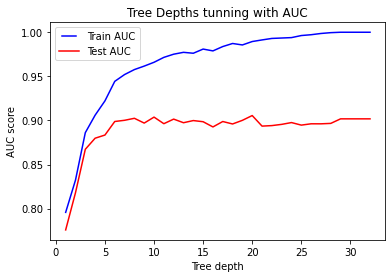

In [0]:
# tuning max_depths
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion = "gini",random_state = 0,
                                  max_depth=max_depth) 
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.title("Tree Depths tunning with AUC")
plt.show()


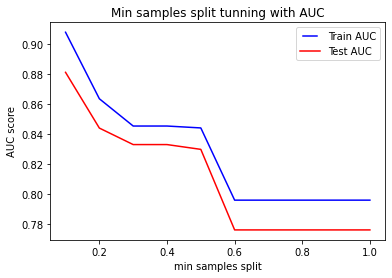

In [0]:
# tuning min_samples_splits
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion = "gini", min_samples_split=min_samples_split)
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.title("Min samples split tunning with AUC")
plt.show()

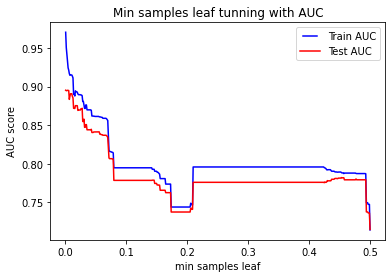

In [0]:
#tuning min_samples_leafs
min_samples_leafs = np.linspace(0.001, 0.500, 500, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
  dt = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=min_samples_leaf)
  dt.fit(X_train, Y_train)
  train_pred = dt.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = dt.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label= "Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.title("Min samples leaf tunning with AUC")
plt.show()

Plot the tree to observe knowledge (gini and entropy)

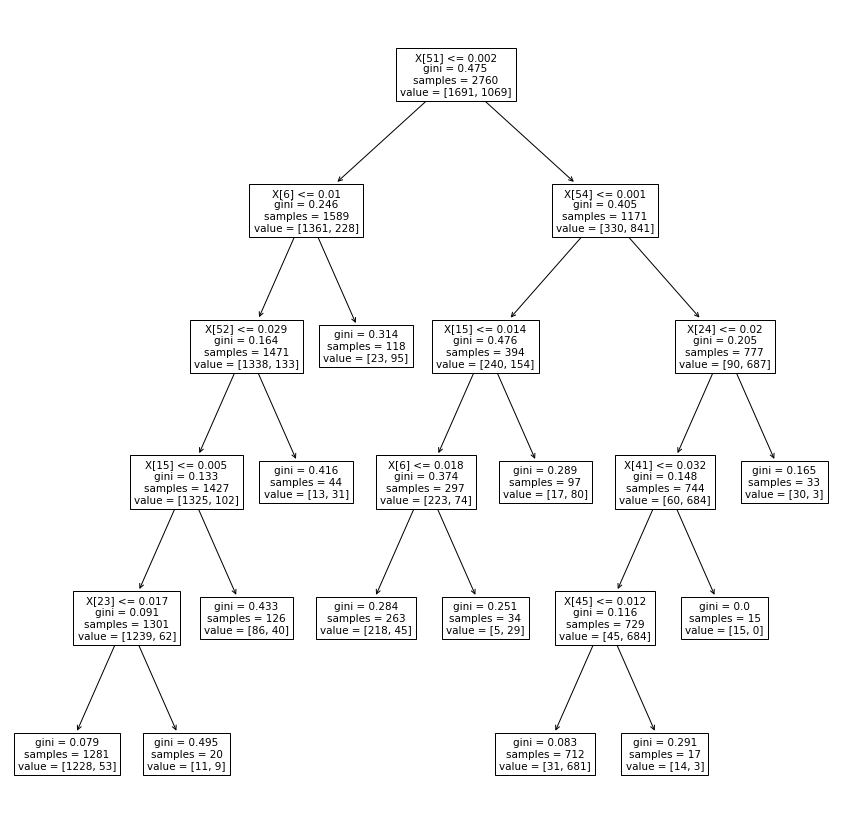

In [0]:
# Plot tree
fig, ax = plt.subplots(figsize=(15, 15))  # whatever size you want
tree.plot_tree(clf_gini, ax=ax)
plt.show()

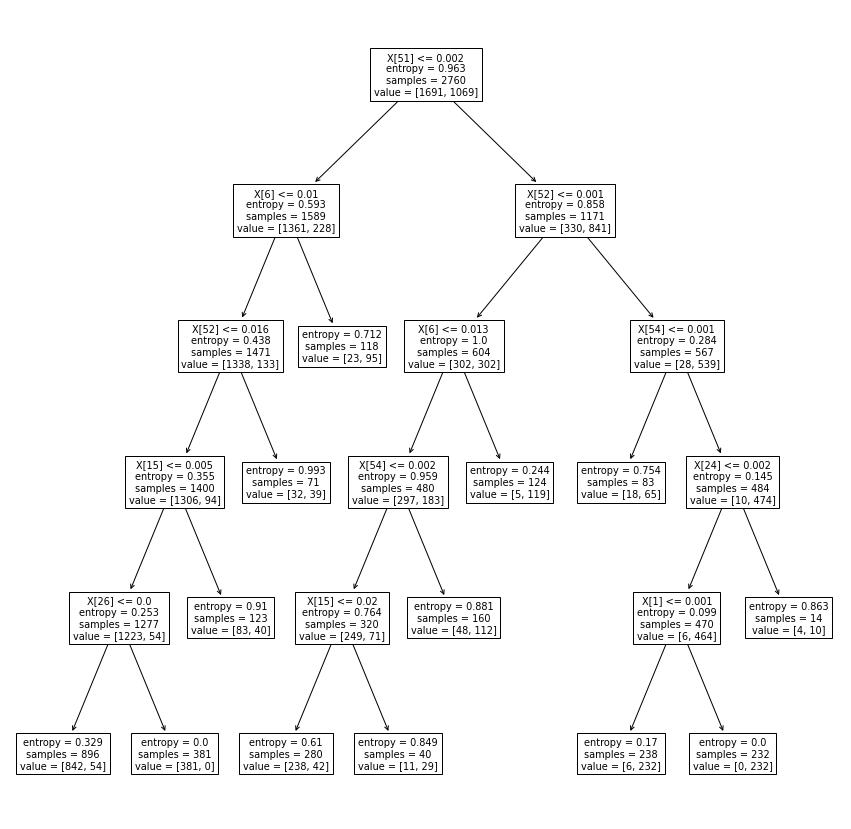

In [0]:
# Plot tree
fig, ax = plt.subplots(figsize=(15, 15))  # whatever size you want
tree.plot_tree(clf_entropy, ax=ax)
plt.show()

Calculate the confusion matrix to conduct evaluation

In [0]:
print("---------------------DT with gini---------------------")
# Calculate accuracy
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred_gini)) 

print ("Accuracy : ", 
  accuracy_score(Y_test,y_pred_gini)*100) 

print("Report : ")
print(classification_report(Y_test, y_pred_gini)) 

print("---------------------DT with entropy---------------------")
# Calculate accuracy
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred_entropy)) 

print ("Accuracy : ", 
  accuracy_score(Y_test,y_pred_entropy)*100,) 

print("Report : ")
print(classification_report(Y_test, y_pred_entropy)) 


---------------------DT with gini---------------------
Confusion Matrix: 
[[1030   67]
 [ 134  610]]
Accuracy :  89.082020640956
Report : 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1097
           1       0.90      0.82      0.86       744

    accuracy                           0.89      1841
   macro avg       0.89      0.88      0.88      1841
weighted avg       0.89      0.89      0.89      1841

---------------------DT with entropy---------------------
Confusion Matrix: 
[[1011   86]
 [ 112  632]]
Accuracy :  89.24497555676263
Report : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1097
           1       0.88      0.85      0.86       744

    accuracy                           0.89      1841
   macro avg       0.89      0.89      0.89      1841
weighted avg       0.89      0.89      0.89      1841



Plot the roc & auc graph

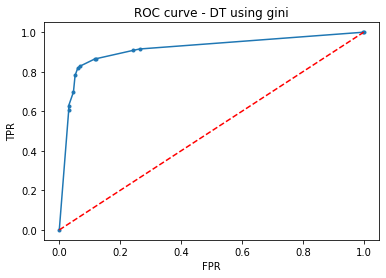

ROC AUC: 0.91


In [0]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score

prob = clf_gini.predict_proba(X_test)
prob_pos = prob[:,clf_gini.classes_==1]
fpr, tpr, _ = roc_curve(Y_test,prob_pos,1)
plt.plot(fpr, tpr, marker='.', label='Decision Tree with gini')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve - DT using gini')
plt.show()

roc_auc = roc_auc_score(Y_test,prob_pos)
print("ROC AUC: {:.2f}".format(roc_auc))

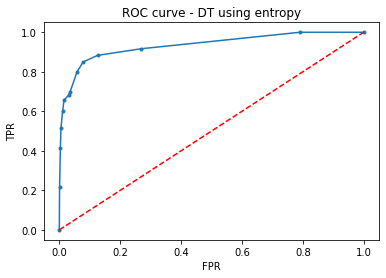

ROC AUC: 0.93


In [0]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score

prob = clf_entropy.predict_proba(X_test)
prob_pos = prob[:,clf_entropy.classes_==1]
fpr, tpr, _ = roc_curve(Y_test,prob_pos,1)
plt.plot(fpr, tpr, marker='.', label='Decision Tree with entropy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve - DT using entropy')
plt.show()

roc_auc = roc_auc_score(Y_test,prob_pos)
print("ROC AUC: {:.2f}".format(roc_auc))

***

# Conclusion

Developing a model to identify spam mails,we tried different methodology and compared their performance. With analyzing the frequency of words, we could find the suitable methods for handling this case.

Methodology:

1.   Decision Tree
2.   K-nearest neighbor
3.   Ensemble learning (AdaBoost)
4.   Clustering Learning(K-means)


We would like to compare the performance on each methods. We find that K-means is not suitable for this case as the accuracy(63.59%) is not acceptable. 

Test Results:

> Methodology | Precision | Accuracy | ROC AUC
>---| --- | --- | ---
>K-Nearest Neighbor |  0.88 | 0.90 | 0.95
>**AdaBoost** |  **0.94** | **0.93** | **0.98**
>Decision Tree |  0.90 | 0.89 | 0.91(Gini) , 0.93(Entropy)

According to the table, AdaBoost performance the best between these methodology. It contains the highest precision, accuracy and ROC AUC score.  For the reason, AdaBoost focuses on classification problems and aims to convert a set of weak classifiers into strong one.


# Reference


1. Code Faster with Line-of-Code Completions, Cloudless Processing. (n.d.). Retrieved from https://kite.com/python/answers/how-to-plot-an-roc-curve-in-python
2. Fraj, M. B. (2017, December 20). InDepth: Parameter tuning for Decision Tree. Retrieved from https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
3. Navlani A. (2018),AdaBoost Classifier in Python, DataCamp, retrieved from  https://www.datacamp.com/community/tutorials/adaboost-classifier-python
4. Maklin, C. (2019, July 27). Decision Tree In Python. Retrieved from https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93
